</br>
<center><h1>CB.EN.P2CSE20021_CaseStudy_Review-1</h1></center>
<center><h3>April 05, 2021</h3></center> <br>

# EDA on Climate data for Gandhinagar city


Import the modules to be used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the entire global dataset and printing the first five rows

In [2]:
# Dataset is quite large and .csv link cannot be generated from kaggle.
# So I've modified the dataset and then I'm reading it later in the notebook.
# Executing the notebook again won't give the same output for following few cells.

# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCity.csv
# data = pd.read_csv("GlobalLandTemperaturesByCity.csv")
# data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


Descriptive statistics of the entire dataset.

In [3]:
# print("Total rows in the dataset:",data.count()["dt"])
# print("Maximum recorded temperature:",data.max()["AverageTemperature"])
# print("Minimum recorded temperature:",data.min()["AverageTemperature"])

Total rows in the dataset: 8599212
Maximum recorded temperature: 39.651
Minimum recorded temperature: -42.70399999999999


List of cities.

In [4]:
# print(sorted(dict(data["City"].value_counts()).keys()))

['A Coruña', 'Aachen', 'Aalborg', 'Aba', 'Abadan', 'Abakaliki', 'Abakan', 'Abbotsford', 'Abengourou', 'Abeokuta', 'Aberdeen', 'Abha', 'Abidjan', 'Abiko', 'Abilene', 'Abohar', 'Abomey Calavi', 'Abu Dhabi', 'Abuja', 'Acapulco', 'Acarigua', 'Accra', 'Achalpur', 'Acheng', 'Achinsk', 'Acuña', 'Adana', 'Addis Abeba', 'Adelaide', 'Aden', 'Adilabad', 'Adiwerna', 'Adoni', 'Afyonkarahisar', 'Agadir', 'Agartala', 'Agboville', 'Ageo', 'Agra', 'Aguascalientes', 'Ahmadabad', 'Ahmadnagar', 'Ahmadpur East', 'Ahvaz', 'Aix En Provence', 'Aizawl', 'Ajdabiya', 'Ajmer', 'Akashi', 'Akishima', 'Akita', 'Akola', 'Akron', 'Aksaray', 'Aksu', 'Aktau', 'Akure', 'Akyab', 'Alagoinhas', 'Alandur', 'Alanya', 'Alappuzha', 'Albacete', 'Alberton', 'Albuquerque', 'Albury', 'Alcalá De Henares', 'Alcobendas', 'Alcorcón', 'Aleppo', 'Alexandria', 'Algeciras', 'Algiers', 'Aligarh', 'Allahabad', 'Allentown', 'Almaty', 'Almere', 'Almería', 'Almetyevsk', 'Alor Setar', 'Altay', 'Alwar', 'Amadora', 'Amagasaki', 'Amaigbo', 'Amarill

Extract data for **Gandhinagar** city from the dataset and store it in csv (Isn't actually needed but as dataset is large I've extracted and stored it in csv file and then uploaded to github to get the .csv link)

In [5]:
# city_data = data[data["City"]=="Gandhinagar"]
# city_data
# city_data.to_csv("Gandhinagar_Climate_data.csv")

Read extracted data for **Gandhinagar** city

In [6]:
url='https://raw.githubusercontent.com/Jinal7599/Climate_change_data/main/Gandhinagar_Climate_data.csv'
city_data = pd.read_csv(url,sep=",")
city_data.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,2469462,1796-01-01,19.649,2.286,Gandhinagar,India,23.31N,72.52E
1,2469463,1796-02-01,21.632,1.770,Gandhinagar,India,23.31N,72.52E
2,2469464,1796-03-01,24.953,2.427,Gandhinagar,India,23.31N,72.52E
3,2469465,1796-04-01,30.297,1.827,Gandhinagar,India,23.31N,72.52E
4,2469466,1796-05-01,33.223,1.496,Gandhinagar,India,23.31N,72.52E


Descriptive statistics of Gandhinagar data

In [7]:
print("Total rows in the dataset:",city_data.count()["dt"])
print("Maximum recorded temperature:",city_data.max()["AverageTemperature"])
print("Minimum recorded temperature:",city_data.min()["AverageTemperature"])
print("Average recorded temperature:",city_data.mean()["AverageTemperature"])

Total rows in the dataset: 2613
Maximum recorded temperature: 35.41900000000001
Minimum recorded temperature: 16.792
Average recorded temperature: 26.52985294117647


Describe the data.

In [8]:
city_data.describe(include=['object'])

,dt,City,Country,Latitude,Longitude
count,2613,2613,2613,2613,2613
unique,2613,1,1,1,1
top,1990-12-01,Gandhinagar,India,23.31N,72.52E
freq,1,2613,2613,2613,2613


The columns 'City', 'Country', 'Latitude', and 'Longitude' contains unique data. These columns would not provide any information in our analysis. So, let us drop these columns from the dataset.

In [9]:
city_data = city_data.drop(["City","Country","Latitude","Longitude"],axis=1)
city_data.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty
0,2469462,1796-01-01,19.649,2.286
1,2469463,1796-02-01,21.632,1.770
2,2469464,1796-03-01,24.953,2.427
3,2469465,1796-04-01,30.297,1.827
4,2469466,1796-05-01,33.223,1.496


We split the 'dt' column into three new columns - 'date', 'month', and 'year'.

In [10]:
city_data[['year', 'month', 'date']] = city_data.dt.str.split("-",expand=True)
city_data.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,year,month,date
0,2469462,1796-01-01,19.649,2.286,1796,01,01
1,2469463,1796-02-01,21.632,1.770,1796,02,01
2,2469464,1796-03-01,24.953,2.427,1796,03,01
3,2469465,1796-04-01,30.297,1.827,1796,04,01
4,2469466,1796-05-01,33.223,1.496,1796,05,01


Look at the datatype of each column.

In [11]:
city_data.dtypes

Unnamed: 0                         int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
year                              object
month                             object
date                              object
dtype: object

We can see that the column 'dt' is of type 'object'. We will change that to 'datetime'.

Also, we will change 'year', 'month', and 'date' to integer.

In [12]:
city_data['dt'] = pd.to_datetime(city_data['dt'])
city_data['year'] = city_data['year'].astype(str).astype(int)
city_data['month'] = city_data['month'].astype(str).astype(int)
city_data['date'] = city_data['date'].astype(str).astype(int)
city_data.dtypes

Unnamed: 0                                int64
dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
year                                      int32
month                                     int32
date                                      int32
dtype: object

We no longer need the 'dt' column because that information is now contained in 'year', 'month', and 'date' columns.

Moreover, the 'date' column now contain only an unique ('01') value. Let us drop these two columns as well.

In [13]:
city_data = city_data.drop(["dt","date"],axis=1)
city_data.head()

,Unnamed: 0,AverageTemperature,AverageTemperatureUncertainty,year,month
0,2469462,19.649,2.286,1796,1
1,2469463,21.632,1.770,1796,2
2,2469464,24.953,2.427,1796,3
3,2469465,30.297,1.827,1796,4
4,2469466,33.223,1.496,1796,5


For the sake of easier refrence, let us rename the 'AverageTemperature' and 'AverageTemperatureUncertainty' columns to 'temperature' and 'deviation', respectively.

In [14]:
city_data.rename(columns = {'AverageTemperature':'temperature', 'AverageTemperatureUncertainty':'deviation'}, inplace = True)
city_data.head()

,Unnamed: 0,temperature,deviation,year,month
0,2469462,19.649,2.286,1796,1
1,2469463,21.632,1.770,1796,2
2,2469464,24.953,2.427,1796,3
3,2469465,30.297,1.827,1796,4
4,2469466,33.223,1.496,1796,5


Discard the index from the original global dataset, and reset the index.

In [15]:
#city_data.reset_index(inplace=True) ## This resets the index to start from 0
city_data.index = np.arange(1, len(city_data) + 1) ## This resets the index to start from 0
city_data.head()

,Unnamed: 0,temperature,deviation,year,month
1,2469462,19.649,2.286,1796,1
2,2469463,21.632,1.770,1796,2
3,2469464,24.953,2.427,1796,3
4,2469465,30.297,1.827,1796,4
5,2469466,33.223,1.496,1796,5


Analyze the dataset for missing data.

In [16]:
missing_data = city_data[city_data.isnull().any(axis=1)]
print("Total rows with missing data:",len(missing_data))

Total rows with missing data: 165


Histogram of the years with missing data.

<AxesSubplot:xlabel='year', ylabel='count'>

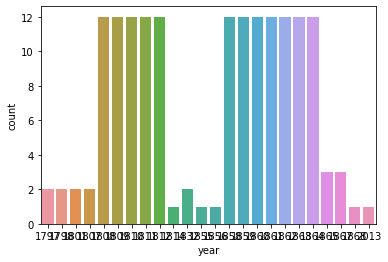

In [17]:
sns.countplot(x="year", data=missing_data)

Histogram of the months with missing data.

<AxesSubplot:xlabel='month', ylabel='count'>

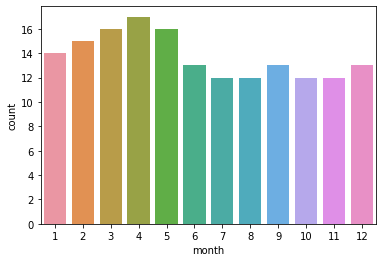

In [18]:
sns.countplot(x="month", data=missing_data)

Remove the rows with missing data from our dataset.

In [19]:
print("Number of rows before removing missing data:",len(city_data))
city_data = city_data.dropna()
print("Number of rows after removing missing data:",len(city_data))

Number of rows before removing missing data: 2613
Number of rows after removing missing data: 2448


Plot the lineplot of monthly average temperature.

<AxesSubplot:xlabel='month', ylabel='temperature'>

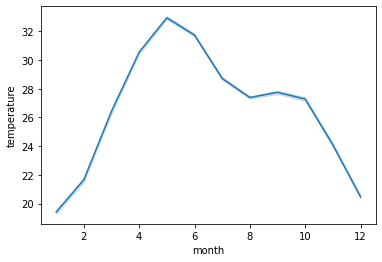

In [20]:
sns.lineplot(x="month", y="temperature", data=city_data)

Plot the mean temperature for each year in our dataset.

<AxesSubplot:xlabel='year', ylabel='temperature'>

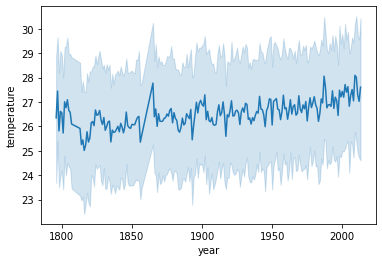

In [21]:
sns.lineplot(data=city_data, x="year", y="temperature")

Plot the median temperature for each year in the dataset.

<AxesSubplot:xlabel='year', ylabel='temperature'>

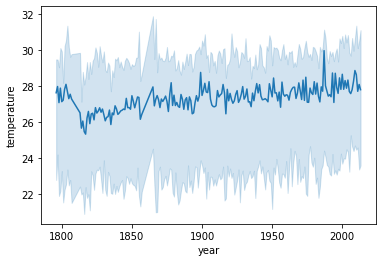

In [22]:
sns.lineplot(data=city_data, x="year", y="temperature", estimator=np.median)

Plot the mean temperature for all years in the dataset for the month of January.

<AxesSubplot:xlabel='year', ylabel='temperature'>

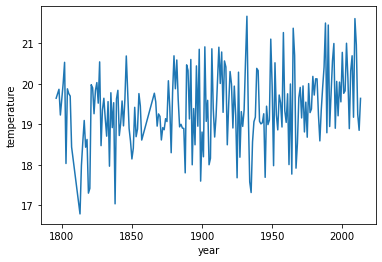

In [23]:
sns.lineplot(data=city_data[city_data["month"]==1], x="year", y="temperature")

Plot the mean temperature for all years in the dataset for the month of June.

<AxesSubplot:xlabel='year', ylabel='temperature'>

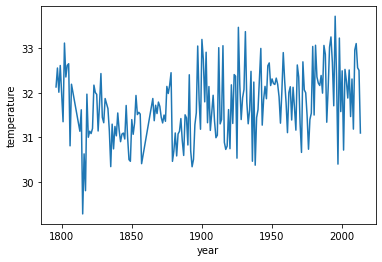

In [24]:
sns.lineplot(data=city_data[city_data["month"]==6], x="year", y="temperature")

Plot the lineplot of mean deviation for each month in our dataset

<AxesSubplot:xlabel='month', ylabel='deviation'>

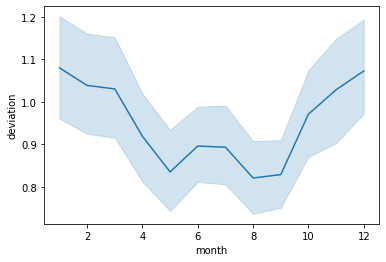

In [25]:
sns.lineplot(x="month", y="deviation", data=city_data)

Plot the deviation for each year in the dataset for the month of January.

<AxesSubplot:xlabel='year', ylabel='deviation'>

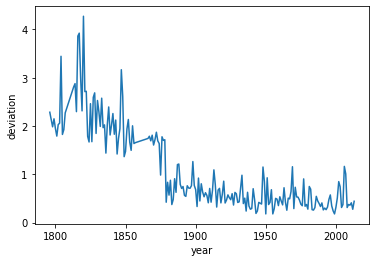

In [26]:
sns.lineplot(x="year", y="deviation", data=city_data[city_data["month"]==1])

Plot the deviation for each year in the dataset for the month of June.

<AxesSubplot:xlabel='year', ylabel='deviation'>

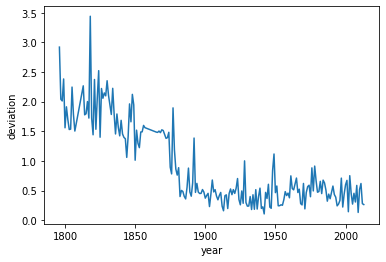

In [27]:
sns.lineplot(x="year", y="deviation", data=city_data[city_data["month"]==6])

Plot a scatterplot to see if there exists any correlation between temperature and deviation.

<AxesSubplot:xlabel='temperature', ylabel='deviation'>

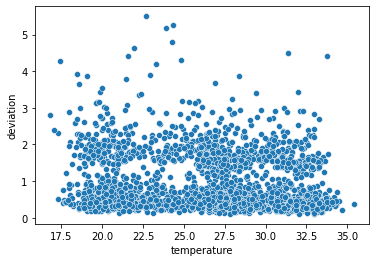

In [28]:
sns.scatterplot(data=city_data, x="temperature", y="deviation")

Plot a 3D scatterplot to see if we can find any temperature, month and year.

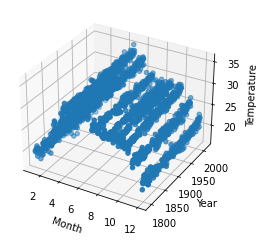

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(city_data['month'], city_data['year'], city_data['temperature'], marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Temperature')
plt.show()